In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer
import numpy as np

In [2]:
import sys
import os
from os.path import dirname
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sys.path.append(dirname('../src'))
from src.utils import utils
data = utils.load_df("../Data/feature_eng.pkl")
data.head(5)

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,...,label,ANALGESICOS_OPIOIDES___,num_ANALGESICOS_OPIOIDES___,avg_ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,num_g1_ANALGESICOS,avg_g1_ANALGESICOS,g2_ANESTESIA,num_g2_ANESTESIA,avg_g2_ANESTESIA
0,AAAZ581217189U5PC3,1,M,4,1.33333,1,1998,0.0588288,0,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1,AAAZ581217189U5PC3,2,M,3,1,1,1998,0.108582,0,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2,AAAZ581217189U5PC3,3,M,5,1.66667,1,1998,0.271919,0,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
3,AADV5603014KS44QC1,1,M,4,1.33333,1,1999,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
4,AADV5603014KS44QC1,2,M,3,1,1,1999,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


<AxesSubplot:>

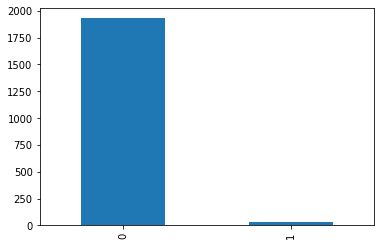

In [3]:
data['label'].value_counts().plot.bar()

In [4]:
data[data['sum_num_consultas']==0]

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,...,label,ANALGESICOS_OPIOIDES___,num_ANALGESICOS_OPIOIDES___,avg_ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,num_g1_ANALGESICOS,avg_g1_ANALGESICOS,g2_ANESTESIA,num_g2_ANESTESIA,avg_g2_ANESTESIA
43,AEDJ750301XGAEGRC1,2,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
44,AEDJ750301XGAEGRC1,3,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
45,AEDJ750301XGAEGRC1,4,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
46,AEDJ750301XGAEGRC1,5,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
47,AEDJ750301XGAEGRC1,6,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,ZEPL5503219FZQ6QC2,22,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1944,ZEPL5503219FZQ6QC2,23,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1945,ZEPL5503219FZQ6QC2,24,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1946,ZEPL5503219FZQ6QC2,25,,0,0,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


- Eliminando filas que no aportan información

In [5]:
data = data[data['sum_num_consultas']>0]
data = data.reset_index()
data = data.drop(columns=['index'])
data

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,...,label,ANALGESICOS_OPIOIDES___,num_ANALGESICOS_OPIOIDES___,avg_ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,num_g1_ANALGESICOS,avg_g1_ANALGESICOS,g2_ANESTESIA,num_g2_ANESTESIA,avg_g2_ANESTESIA
0,AAAZ581217189U5PC3,1,M,4,1.33333,1,1998,0.0588288,0,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1,AAAZ581217189U5PC3,2,M,3,1,1,1998,0.108582,0,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2,AAAZ581217189U5PC3,3,M,5,1.66667,1,1998,0.271919,0,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
3,AADV5603014KS44QC1,1,M,4,1.33333,1,1999,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
4,AADV5603014KS44QC1,2,M,3,1,1,1999,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,ZEPL5503219FZQ6QC2,36,F,2,0.666667,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1337,ZEPL5503219FZQ6QC2,37,F,3,1,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1338,ZEPL5503219FZQ6QC2,38,F,3,1,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1339,ZEPL5503219FZQ6QC2,39,F,2,0.666667,0,NaN,NaN,NaN,0,...,0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN


<AxesSubplot:>

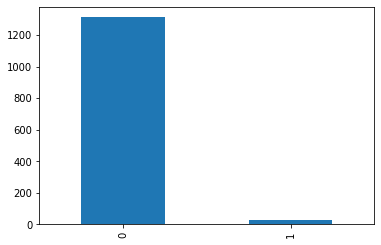

In [6]:
data['label'].value_counts().plot.bar()

- Eliminando columnas que no aportan información

In [7]:
subset_df = data.loc[:, data.isnull().all()]
col_null = list(subset_df.columns)
col_null

['año_dx_hta',
 'hta_años_flt',
 'hta_años_int',
 'num_med_ldl',
 'avg_ldl',
 'min_ldl',
 'max_ldl',
 'num_med_plaquetas',
 'avg_plaquetas',
 'min_plaquetas',
 'max_plaquetas',
 'num_med_tuberculosis',
 'avg_tuberculosis',
 'num_med_ot_enf_bacterianas',
 'avg_ot_enf_bacterianas',
 'num_med_inf_trans_pred_sexual',
 'avg_inf_trans_pred_sexual',
 'num_med_rickettsiosis_y_ot_enf__protozoarios',
 'avg_rickettsiosis_y_ot_enf__protozoarios',
 'num_med_tumores_malig_labio_bucal_faringe',
 'avg_tumores_malig_labio_bucal_faringe',
 'num_med_tumores_malig_organos',
 'avg_tumores_malig_organos',
 'num_med_tumores_malig_org_genitourinarios',
 'avg_tumores_malig_org_genitourinarios',
 'num_med_tumores_malig_otros_sitios_ne',
 'avg_tumores_malig_otros_sitios_ne',
 'num_med_tumores_malig_tejido_linf_org_hematop',
 'avg_tumores_malig_tejido_linf_org_hematop',
 'num_med_tumores_comp_incierto_desc',
 'avg_tumores_comp_incierto_desc',
 'num_med_enf_sangre_org_hematop',
 'avg_enf_sangre_org_hematop',
 'num

In [8]:
data.drop(col_null, axis=1, inplace=True)
list(data.columns)

['cx_curp',
 'ventana',
 'sexo',
 'sum_num_consultas',
 'avg_num_consultas_by_year',
 'dm',
 'año_dx_dm',
 'dm_años_flt',
 'dm_años_int',
 'hta',
 'renal',
 'renal_años_flt',
 'renal_años_int',
 'edad_range',
 'epoca_nac',
 'imc_range',
 'num_med',
 'avg_num_med',
 'min_num_med',
 'max_num_med',
 'preglucosa',
 'num_med_preglucosa',
 'avg_preglucosa',
 'min_preglucosa',
 'max_preglucosa',
 'postglucosa',
 'num_med_postglucosa',
 'avg_postglucosa',
 'min_postglucosa',
 'max_postglucosa',
 'colesterol',
 'num_med_colesterol',
 'avg_colesterol',
 'min_colesterol',
 'max_colesterol',
 'trigliceridos',
 'num_med_trigliceridos',
 'avg_trigliceridos',
 'min_trigliceridos',
 'max_trigliceridos',
 'hdl',
 'num_med_hdl',
 'avg_hdl',
 'min_hdl',
 'max_hdl',
 'ldl',
 'presion_arterial',
 'num_med_presion_a',
 'avg_sistolica_a',
 'min_sistolica_a',
 'max_sistolica_a',
 'avg_diastolica_a',
 'min_diastolica_a',
 'max_diastolica_a',
 'hba1c',
 'num_med_hba1c',
 'avg_hba1c',
 'min_hba1c',
 'max_hba1c',

In [9]:
display(data[['imc_range']])
data = data.loc[:,~data.columns.duplicated()].copy()
data[['imc_range']]

,imc_range
0,2
1,2
2,2
3,4
4,4
...,...
1336,2
1337,2
1338,2
1339,2


,imc_range
0,2
1,2
2,2
3,4
4,4
...,...
1336,2
1337,2
1338,2
1339,2


In [10]:
data.shape

(1341, 485)

In [11]:
data['imc_range'].unique()

array([2, 4, 3, 1, nan], dtype=object)

In [12]:
data[pd.isna(data['imc_range'])]

,cx_curp,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,...,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label,ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,g2_ANESTESIA
303,DIJC38112055K14KA2,27,F,1,0.333333,1,1995,NaN,NaN,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
390,DIRL630201M8ADARC1,30,F,2,0.666667,1,2001,NaN,NaN,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
637,LOVM470206XDKAIMD2,11,F,1,0.333333,1,2005,NaN,NaN,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
754,MAJJ870410UVK09PC1,60,M,1,0.333333,1,2010,3.30962,3,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
951,PAGJ690411WZ0YDRC1,31,M,1,0.333333,1,2007,3.97057,3,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
952,PAGJ690411WZ0YDRC1,32,M,1,0.333333,1,2007,3.97057,3,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
953,PAGJ690411WZ0YDRC1,33,M,1,0.333333,1,2007,3.97057,3,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0


In [13]:
data[data['cx_curp']=='PAGJ690411WZ0YDRC1'][['ventana','imc_range']]

,ventana,imc_range
950,1,4
951,31,NaN
952,32,NaN
953,33,NaN
954,100,3
955,101,3
956,102,3
957,103,3
958,104,3


In [14]:
#data['imc_range'] = data['imc_range'].fillna('Sin dato')
#data['sexo'] = data['sexo'].fillna('Sin dato')
data.loc[(data['sexo'] == 'M'), 'sexo'] = 1
data.loc[(data['sexo'] == 'F'), 'sexo'] = 2

In [15]:
data['sexo'].unique()

array([1, 2], dtype=object)

In [16]:
#df_st = data[['sexo','imc_range']]
#display(df_st.head(5))
#df1 = data.drop(['sexo','imc_range'], axis=1)
#display(df1.head(5))

In [17]:
data[pd.isna(data['label'])][['cx_curp','ventana','label']]

,cx_curp,ventana,label


In [18]:
cx_curp = data['cx_curp'] 
data = data.drop(['cx_curp'], axis=1)

In [19]:
data

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,renal,...,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label,ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,g2_ANESTESIA
0,1,1,4,1.33333,1,1998,0.0588288,0,0,0,...,0,0,0,1,2,0.666667,0,0.0,0.0,0.0
1,2,1,3,1,1,1998,0.108582,0,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
2,3,1,5,1.66667,1,1998,0.271919,0,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
3,1,1,4,1.33333,1,1999,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
4,2,1,3,1,1,1999,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,36,2,2,0.666667,0,NaN,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
1337,37,2,3,1,0,NaN,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
1338,38,2,3,1,0,NaN,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0
1339,39,2,2,0.666667,0,NaN,NaN,NaN,0,0,...,0,0,0,0,NaN,NaN,0,0.0,0.0,0.0


In [20]:
data[pd.isna(data['label'])][['ventana','label']]

,ventana,label


In [21]:
data.shape

(1341, 484)

### Imputaciones

In [22]:
col = list(data.columns)
col

['ventana',
 'sexo',
 'sum_num_consultas',
 'avg_num_consultas_by_year',
 'dm',
 'año_dx_dm',
 'dm_años_flt',
 'dm_años_int',
 'hta',
 'renal',
 'renal_años_flt',
 'renal_años_int',
 'edad_range',
 'epoca_nac',
 'imc_range',
 'num_med',
 'avg_num_med',
 'min_num_med',
 'max_num_med',
 'preglucosa',
 'num_med_preglucosa',
 'avg_preglucosa',
 'min_preglucosa',
 'max_preglucosa',
 'postglucosa',
 'num_med_postglucosa',
 'avg_postglucosa',
 'min_postglucosa',
 'max_postglucosa',
 'colesterol',
 'num_med_colesterol',
 'avg_colesterol',
 'min_colesterol',
 'max_colesterol',
 'trigliceridos',
 'num_med_trigliceridos',
 'avg_trigliceridos',
 'min_trigliceridos',
 'max_trigliceridos',
 'hdl',
 'num_med_hdl',
 'avg_hdl',
 'min_hdl',
 'max_hdl',
 'ldl',
 'presion_arterial',
 'num_med_presion_a',
 'avg_sistolica_a',
 'min_sistolica_a',
 'max_sistolica_a',
 'avg_diastolica_a',
 'min_diastolica_a',
 'max_diastolica_a',
 'hba1c',
 'num_med_hba1c',
 'avg_hba1c',
 'min_hba1c',
 'max_hba1c',
 'plaquetas

In [23]:
# Imputation
my_imputer = SimpleImputer()
d_inp = pd.DataFrame(my_imputer.fit_transform(data))
d_inp

,0,1,2,3,4,5,6,7,8,9,...,474,475,476,477,478,479,480,481,482,483
0,1.0,1.0,4.0,1.333333,1.0,1998.000000,0.058829,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,2.000000,0.666667,0.0,0.0,0.0,0.0
1,2.0,1.0,3.0,1.000000,1.0,1998.000000,0.108582,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
2,3.0,1.0,5.0,1.666667,1.0,1998.000000,0.271919,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
3,1.0,1.0,4.0,1.333333,1.0,1999.000000,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
4,2.0,1.0,3.0,1.000000,1.0,1999.000000,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,36.0,2.0,2.0,0.666667,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
1337,37.0,2.0,3.0,1.000000,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
1338,38.0,2.0,3.0,1.000000,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
1339,39.0,2.0,2.0,0.666667,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0


In [24]:
d_inp.shape

(1341, 484)

In [25]:
d_inp.columns = col
d_inp

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,renal,...,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label,ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,g2_ANESTESIA
0,1.0,1.0,4.0,1.333333,1.0,1998.000000,0.058829,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,2.000000,0.666667,0.0,0.0,0.0,0.0
1,2.0,1.0,3.0,1.000000,1.0,1998.000000,0.108582,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
2,3.0,1.0,5.0,1.666667,1.0,1998.000000,0.271919,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
3,1.0,1.0,4.0,1.333333,1.0,1999.000000,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
4,2.0,1.0,3.0,1.000000,1.0,1999.000000,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,36.0,2.0,2.0,0.666667,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
1337,37.0,2.0,3.0,1.000000,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
1338,38.0,2.0,3.0,1.000000,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
1339,39.0,2.0,2.0,0.666667,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0


In [26]:
#df_st

In [27]:
#df = pd.merge(d_inp, df_st, left_index=True, right_index=True)  
df = d_inp.copy()
df

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,renal,...,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,label,ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,g2_ANESTESIA
0,1.0,1.0,4.0,1.333333,1.0,1998.000000,0.058829,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,2.000000,0.666667,0.0,0.0,0.0,0.0
1,2.0,1.0,3.0,1.000000,1.0,1998.000000,0.108582,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
2,3.0,1.0,5.0,1.666667,1.0,1998.000000,0.271919,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
3,1.0,1.0,4.0,1.333333,1.0,1999.000000,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
4,2.0,1.0,3.0,1.000000,1.0,1999.000000,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,36.0,2.0,2.0,0.666667,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
1337,37.0,2.0,3.0,1.000000,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
1338,38.0,2.0,3.0,1.000000,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0
1339,39.0,2.0,2.0,0.666667,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0.0


In [28]:
X = df.loc[:, df.columns != 'label']
Y = df[["label"]]

In [29]:
!pip install imblearn

You should consider upgrading via the '/home/aide/.pyenv/versions/3.7.4/envs/itam_intro_to_ds/bin/python3.7 -m pip install --upgrade pip' command.


In [30]:
import imblearn

In [31]:
print(X.shape)
print(Y.shape)

(1341, 483)
(1341, 1)


In [32]:
Y

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1336,0.0
1337,0.0
1338,0.0
1339,0.0


In [33]:
#transformers = [('genero', OneHotEncoder(),['sexo'])]
#col_trans_sexo = ColumnTransformer(transformers, remainder="drop", n_jobs=-1, verbose=True)
##este no se corre mas que una sola vez porque es el que calibra
#col_trans_sexo.fit(df)
#col_trans_sexo.get_feature_names()

In [34]:
#sexo_transformada = col_trans_sexo.transform(df)
#df_sexo = pd.DataFrame(sexo_transformada)
#df_sexo.columns = col_trans_sexo.get_feature_names()
#df_sexo.head()
#df_sexo.replace(np.nan,0)

In [35]:
#transformers = [('imc_r', OneHotEncoder(),['imc_range'])]
#col_trans_imc_range = ColumnTransformer(transformers, remainder="drop", n_jobs=-1, verbose=True)
##este no se corre mas que una sola vez porque es el que calibra
#col_trans_imc_range.fit(df)
#col_trans_imc_range.get_feature_names()

In [36]:
#imc_range_transformada = col_trans_imc_range.transform(df)
#df_imc_range = pd.DataFrame(imc_range_transformada.toarray())
#df_imc_range.columns = col_trans_imc_range.get_feature_names()
#df_imc_range.head()
#df_imc_range.replace(np.nan,0)

In [37]:
print(X.shape)
#print(df_imc_range.shape)
#print(df_sexo.shape)

(1341, 483)


- Uniendo onehotencoder

In [38]:
#X = pd.concat([X, df_sexo, df_imc_range], axis= 1)
#X.shape

In [39]:
X.dtypes

ventana                      float64
sexo                         float64
sum_num_consultas            float64
avg_num_consultas_by_year    float64
dm                           float64
                              ...   
num_VITAMINICOS              float64
avg_VITAMINICOS              float64
ANALGESICOS_OPIOIDES___      float64
g1_ANALGESICOS               float64
g2_ANESTESIA                 float64
Length: 483, dtype: object

In [40]:
print(Y.size)
Y = Y.astype(int)

1341


In [41]:
#X.drop(['sexo','imc_range'], axis=1, inplace=True)

In [42]:
X.to_csv("../Data/X.csv")

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [44]:
# Parámetros para la mejor selección de variables
grid_param = {
    'n_estimators': [100, 150],
    'min_samples_split': [2, 5, 7, 10,15]
}

#classifier = RandomForestClassifier()
classifier = RandomForestClassifier(oob_score=True, random_state=1234)

#Prepareción del GridSearch
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='precision',
                     cv=2)

In [45]:
print(X_train)

      ventana  sexo  sum_num_consultas  avg_num_consultas_by_year   dm  \
118      22.0   1.0                4.0                   1.333333  1.0   
438      82.0   1.0                4.0                   1.333333  0.0   
124      28.0   1.0                5.0                   1.666667  1.0   
352      76.0   2.0                4.0                   1.333333  1.0   
509       3.0   2.0                4.0                   1.333333  0.0   
...       ...   ...                ...                        ...  ...   
360      84.0   2.0                2.0                   0.666667  1.0   
709      15.0   1.0                3.0                   1.000000  0.0   
439      83.0   1.0                4.0                   1.333333  0.0   
174      38.0   2.0                5.0                   1.666667  0.0   
1146     24.0   1.0                4.0                   1.333333  0.0   

        año_dx_dm  dm_años_flt  dm_años_int  hta  renal  ...  HIPOLIPEMIANTES  \
118   1981.000000     1.694576

In [46]:
print(y_train)

      label
118       0
438       0
124       0
352       0
509       0
...     ...
360       1
709       0
439       0
174       0
1146      0

[938 rows x 1 columns]


In [47]:
Y

,label
0,0
1,0
2,0
3,0
4,0
...,...
1336,0
1337,0
1338,0
1339,0


In [48]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [67]:
#Fit del grid search con r
gd_sr.fit(X_train, y_train)
#gd_sr.fit(X_res, y_res)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(oob_score=True,
                                              random_state=1234),
             param_grid={'min_samples_split': [2, 5, 7, 10, 15],
                         'n_estimators': [100, 150]},
             scoring='precision')

In [68]:
# mejor configuración 
gd_sr.best_estimator_

RandomForestClassifier(oob_score=True, random_state=1234)

In [69]:
gd_sr.best_estimator_.n_features_

483

In [70]:
gd_sr.best_estimator_.oob_score_

0.9776119402985075

### Importancia de variables

In [71]:
best_rf = gd_sr.best_estimator_
best_rf.feature_importances_

array([7.13473791e-02, 1.14766069e-02, 4.27164570e-03, 3.13333510e-03,
       8.58621424e-03, 3.48390468e-02, 3.39897797e-02, 2.24619817e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.22226614e-02, 2.72011310e-02, 2.21227473e-02, 4.78752359e-03,
       4.72911171e-03, 6.78082067e-04, 2.71758836e-03, 9.17138356e-03,
       3.81537780e-02, 3.32245060e-02, 2.62373913e-02, 2.08539177e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.17227306e-04, 2.34949223e-06, 7.30643402e-05,
       1.27242998e-03, 9.99431528e-05, 1.41080563e-03, 5.98608230e-05,
       3.08722356e-04, 5.54005276e-04, 1.14038671e-04, 0.00000000e+00,
       0.00000000e+00, 3.17922993e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.14148588e-02, 3.62190814e-02,
       2.64142669e-02, 2.72858380e-02, 3.15835173e-02, 1.18596453e-02,
       1.69317224e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [72]:
feature_importance = pd.DataFrame({'importance': best_rf.feature_importances_,
                                  'feature': X.columns.values})

In [73]:
importancias = feature_importance.sort_values(by="importance", ascending=False)

In [74]:
pd.set_option('display.max_rows', importancias.shape[0]+1)
importancias

,importance,feature
0,7.134738e-02,ventana
82,4.901386e-02,min_dif_vent_entre_consul
83,4.735171e-02,max_dif_vent_entre_consul
81,4.447472e-02,avg_vent_entre_consul
20,3.815378e-02,num_med_preglucosa
47,3.621908e-02,avg_sistolica_a
5,3.483905e-02,año_dx_dm
6,3.398978e-02,dm_años_flt
21,3.322451e-02,avg_preglucosa
12,3.222266e-02,edad_range


In [75]:
col_imp = list(importancias[importancias['importance']>0]['feature'])
col_imp.append('label')
col_imp

['ventana',
 'min_dif_vent_entre_consul',
 'max_dif_vent_entre_consul',
 'avg_vent_entre_consul',
 'num_med_preglucosa',
 'avg_sistolica_a',
 'año_dx_dm',
 'dm_años_flt',
 'avg_preglucosa',
 'edad_range',
 'avg_diastolica_a',
 'max_sistolica_a',
 'epoca_nac',
 'min_sistolica_a',
 'min_preglucosa',
 'dm_años_int',
 'imc_range',
 'max_preglucosa',
 'max_diastolica_a',
 'min_diastolica_a',
 'sexo',
 'num_med_presion_a',
 'preglucosa',
 'dm',
 'num_ANTIDIABETICOS',
 'num_ANTIULCEROSOS_PROTECTOR_GASTRICO',
 'enf_viricas',
 'enf_sist_osteomuscular_y_tejido',
 'num_E11',
 'num_bezafibrato',
 'avg_g8',
 'num_med',
 'avg_num_med',
 'num_g8',
 'sum_num_consultas',
 'avg_bezafibrato',
 'num_med_tumores_malig_org_respiratorios_intratoracicos',
 'ANTIDIABETICOS',
 'num_R3',
 'num_med_enf_endocrinas',
 'avg_ANTIULCEROSOS_PROTECTOR_GASTRICO',
 'avg_R635',
 'ANTIULCEROSOS_PROTECTOR_GASTRICO',
 'avg_trastornos_sist_genitourinario_consec_proced',
 'avg_num_consultas_by_year',
 'avg_g5',
 'num_I6',
 'avg

In [76]:
d_fe_f = pd.concat([X, Y], axis=1, join='inner')
d_fe_f

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,año_dx_dm,dm_años_flt,dm_años_int,hta,renal,...,HORMONALES,METILXANTINAS,VARIOS,VITAMINICOS,num_VITAMINICOS,avg_VITAMINICOS,ANALGESICOS_OPIOIDES___,g1_ANALGESICOS,g2_ANESTESIA,label
0,1.0,1.0,4.0,1.333333,1.0,1998.000000,0.058829,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,2.000000,0.666667,0.0,0.0,0.0,0
1,2.0,1.0,3.0,1.000000,1.0,1998.000000,0.108582,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0
2,3.0,1.0,5.0,1.666667,1.0,1998.000000,0.271919,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0
3,1.0,1.0,4.0,1.333333,1.0,1999.000000,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0
4,2.0,1.0,3.0,1.000000,1.0,1999.000000,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,36.0,2.0,2.0,0.666667,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0
1337,37.0,2.0,3.0,1.000000,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0
1338,38.0,2.0,3.0,1.000000,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0
1339,39.0,2.0,2.0,0.666667,0.0,2001.089631,1.694576,1.286534,0.0,0.0,...,0.0,0.0,0.0,0.0,1.763158,0.587719,0.0,0.0,0.0,0


In [77]:
d_fe_f = d_fe_f[col_imp]
d_fe_f

,ventana,min_dif_vent_entre_consul,max_dif_vent_entre_consul,avg_vent_entre_consul,num_med_preglucosa,avg_sistolica_a,año_dx_dm,dm_años_flt,avg_preglucosa,edad_range,...,enf_cerebrovasculares,avg_enf_aparato_urinario,num_med_colesterol,R4,FARMACOS_UTILIZADOS_EN_NEFROLOGIA,tumores_insitu,avg_FARMACOS_UTILIZADOS_EN_NEFROLOGIA,acido_urico,g7,label
0,1.0,37.0,42.0,39.666667,2.0,121.25,1998.000000,0.058829,419.5,6.0,...,1.0,0.412698,1.340426,1.0,0.0,1.0,1.104167,0.0,0.0,0
1,2.0,33.0,42.0,38.333333,1.0,120.00,1998.000000,0.108582,391.0,6.0,...,0.0,0.412698,1.340426,0.0,0.0,0.0,1.104167,0.0,0.0,0
2,3.0,0.0,42.0,26.800000,2.0,116.00,1998.000000,0.271919,127.0,6.0,...,1.0,0.412698,1.000000,1.0,0.0,1.0,1.104167,0.0,0.0,0
3,1.0,9.0,38.0,18.666667,1.0,115.00,1999.000000,1.694576,126.0,5.0,...,1.0,0.412698,1.340426,1.0,0.0,1.0,1.104167,0.0,0.0,0
4,2.0,9.0,100.0,39.333333,1.0,120.00,1999.000000,1.694576,373.0,5.0,...,1.0,0.412698,1.340426,1.0,0.0,1.0,1.104167,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,36.0,8.0,98.0,53.000000,1.0,120.00,2001.089631,1.694576,99.0,6.0,...,1.0,0.412698,1.340426,1.0,0.0,1.0,1.104167,0.0,0.0,0
1337,37.0,8.0,98.0,55.000000,1.0,120.00,2001.089631,1.694576,99.0,6.0,...,1.0,0.412698,1.340426,1.0,0.0,1.0,1.104167,0.0,0.0,0
1338,38.0,8.0,98.0,55.000000,1.0,120.00,2001.089631,1.694576,99.0,6.0,...,1.0,0.412698,1.340426,1.0,0.0,1.0,1.104167,0.0,0.0,0
1339,39.0,59.0,98.0,78.500000,1.0,110.00,2001.089631,1.694576,120.0,6.0,...,1.0,0.412698,1.340426,1.0,0.0,1.0,1.104167,0.0,0.0,0


In [78]:
# Guardando modelo
import pickle
pickle.dump(gd_sr, open("modelo_ing.pkl", "wb"))

In [79]:
# Guardando Feature Selection
utils.save_df(d_fe_f, "../Data/feature_sel2.pkl")

In [80]:
subset_df = d_fe_f.loc[:, d_fe_f.isnull().any()]
print(subset_df)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1341 rows x 0 columns]


### Importancia de variables usando shap

In [81]:
import xgboost
import shap

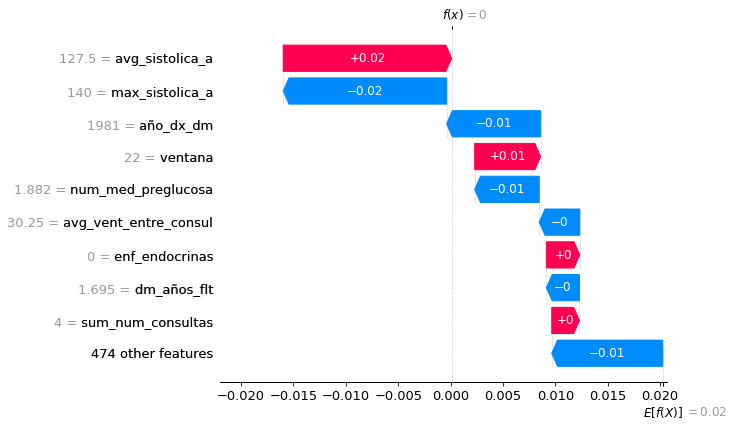

In [82]:
# train an XGBoost model
#X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

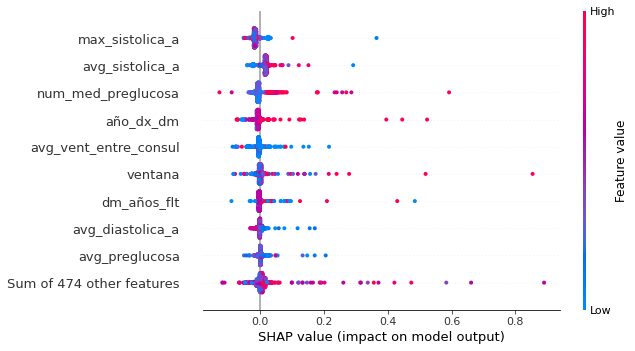

In [83]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

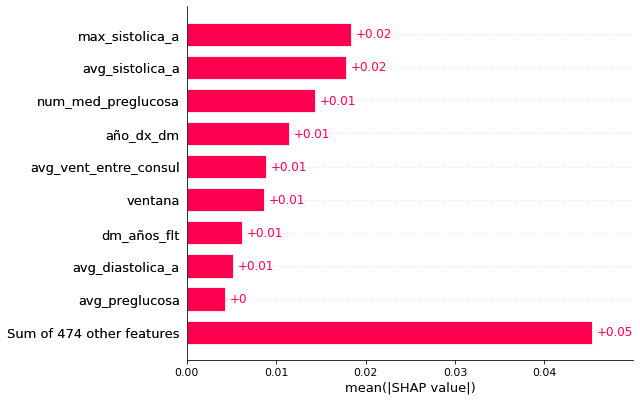

In [84]:
shap.plots.bar(shap_values)